## Clohessy-Wiltshire Equations Simulation

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

### Constants and Initial conditions

In [8]:
Initial_State = [100, 0, 10, 0, 0.1, 0.1] # [x, y, z, x_dot, y_dot, z_dot]
t = np.linspace(0, 20000, 200000)  # Time
mu = 398600  # Standard gravitational parameter for Earth (km^3/s^2)
r = 6000  # Semi-major axis of the target vehicle's orbit (km)
n = np.sqrt(mu / r**3) # Mean motion

### Clohessy-Wiltshire Differential Equations

\begin{cases}
\ddot{x} - 3n^2 x - 2n \dot{y} = 0 \\
\ddot{y} + 2n \dot{x} = 0 \\
\ddot{z} + n^2 z = 0
\end{cases}

In [9]:
def clohessy_wiltshire(state, t):
    x, y, z, x_dot, y_dot, z_dot = state
    dxdt = x_dot
    dydt = y_dot
    dzdt = z_dot
    dx_dotdt = 3 * n**2 * x + 2 * n * y_dot
    dy_dotdt = -2 * n * x_dot
    dz_dotdt = -n**2 * z
    return [dxdt, dydt, dzdt, dx_dotdt, dy_dotdt, dz_dotdt]

solution = odeint(clohessy_wiltshire, Initial_State, t)

x = solution[:,0]
y = solution[:,1]
z = solution[:,2]
x_dot = solution[:,3]
y_dot = solution[:,4]
z_dot = solution[:,5]


### 3D Trajectory Plot

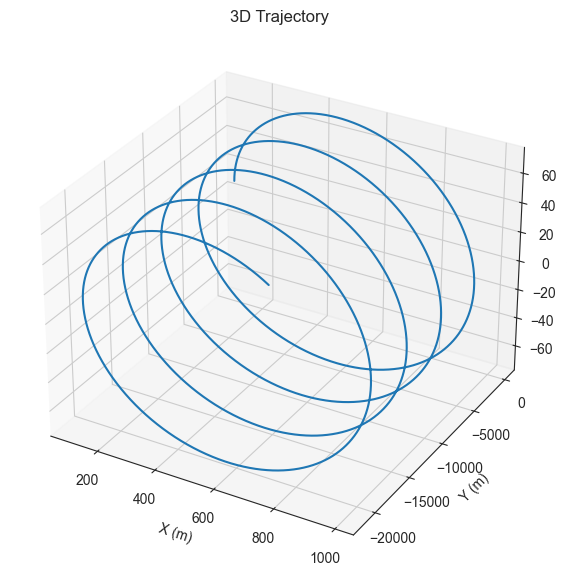

In [10]:
sns.set_style("white")
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title('3D Trajectory')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
plt.show()

### 2D Position and Velocity Plots

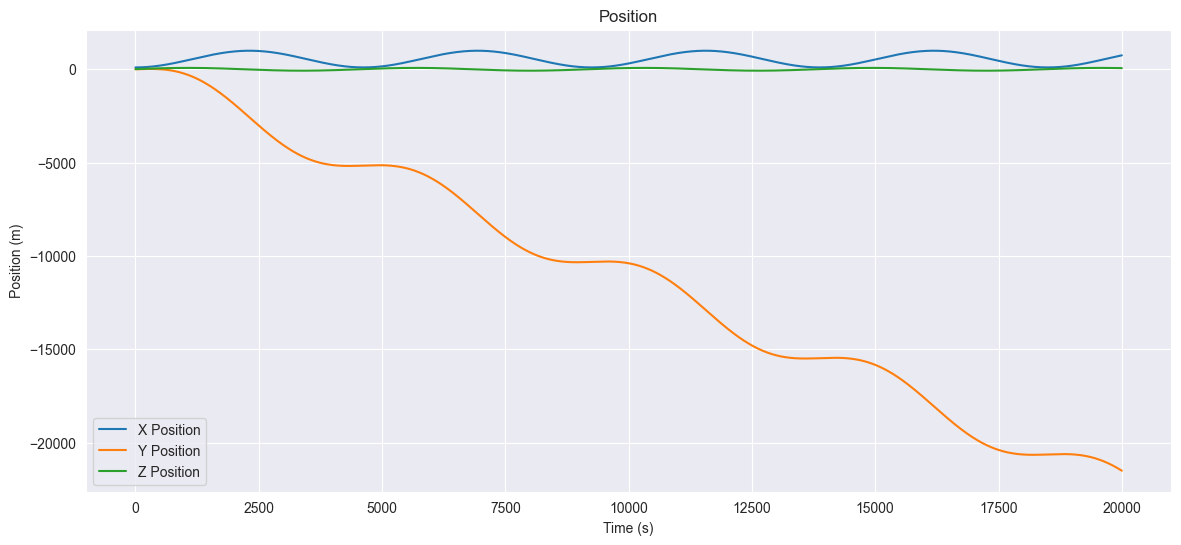

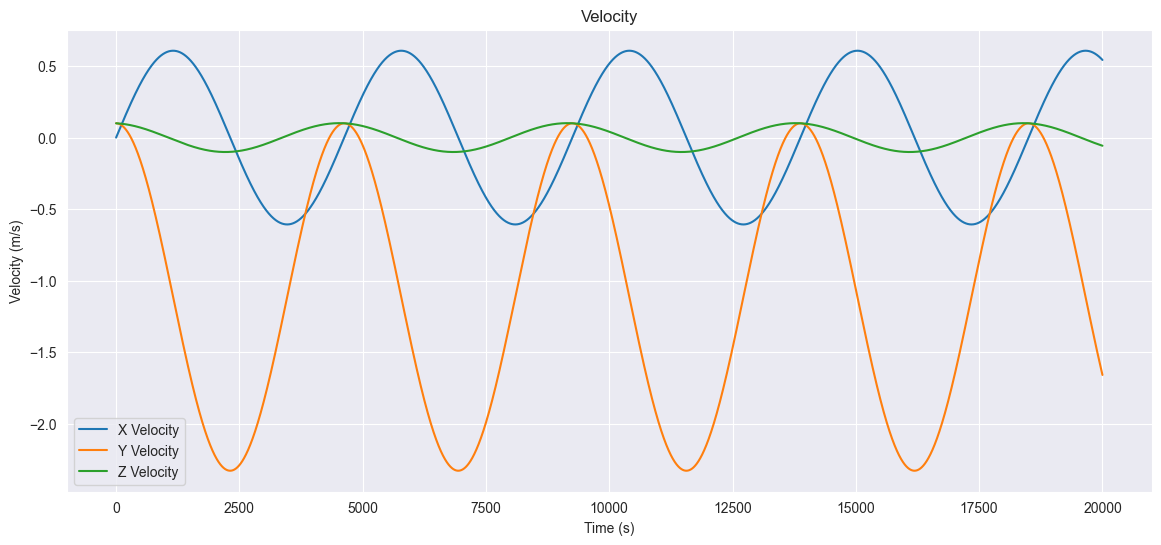

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))
sns.lineplot(x=t, y=x, label='X Position')
sns.lineplot(x=t, y=y, label='Y Position')
sns.lineplot(x=t, y=z, label='Z Position')
plt.title('Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(x=t, y=x_dot, label='X Velocity')
sns.lineplot(x=t, y=y_dot, label='Y Velocity')
sns.lineplot(x=t, y=z_dot, label='Z Velocity')
plt.title('Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.show()